# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

# 1. hr_dataset

In [57]:
#Все необходимые импорты
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

In [58]:
import psycopg2
conn = psycopg2.connect(host='dsstudents.skillbox.ru', user='readonly', password='6hajV34RTQfmxhS', dbname='human_resources')
cursor = conn.cursor()

In [59]:
#Чтение данных из таблицы hr_dataset
cursor.execute('SELECT * FROM hr_dataset')
hr_dataset = cursor.fetchall()
print(len(hr_dataset))

310


In [60]:
cursor.execute("Select * FROM hr_dataset LIMIT 0")
hr_dataset_cols = [desc[0] for desc in cursor.description]
hr_dataset_df = pd.DataFrame(hr_dataset, columns=hr_dataset_cols)
print(hr_dataset_cols)

['id', 'Employee Name', 'Employee Number', 'marriedid', 'maritalstatusid', 'genderid', 'empstatus_id', 'deptid', 'perf_scoreid', 'age', 'Pay Rate', 'state', 'zip', 'dob', 'sex', 'maritaldesc', 'citizendesc', 'Hispanic/Latino', 'racedesc', 'Date of Hire', 'Days Employed', 'Date of Termination', 'Reason For Term', 'Employment Status', 'department', 'position', 'Manager Name', 'Employee Source', 'Performance Score']


BarPlot по половому признаку

In [61]:
cursor.execute('SELECT sex, count(*) as sex_count FROM hr_dataset group by sex')
tmp = cursor.fetchall()
tmp

[('Female', 177), ('Male', 133)]

In [62]:
indexes = []
counts = []
for item in tmp:
    indexes.append(item[0])
    counts.append(item[1])

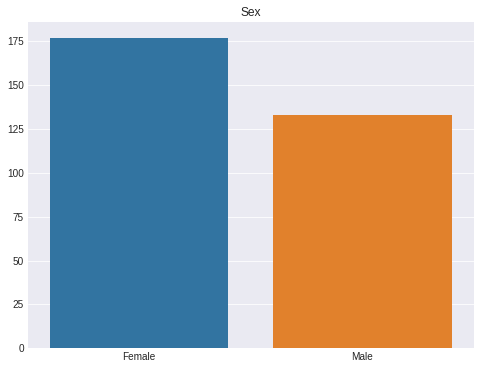

In [63]:
plt.figure(figsize=(8, 6))
plt.title("Sex")
sns.barplot(x=indexes, y=counts)

Плотность распределения возрастного признака

In [64]:
cursor.execute('SELECT age FROM hr_dataset')
tmp = cursor.fetchall()
ages = []
for item in tmp:
    ages.append(item[0])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


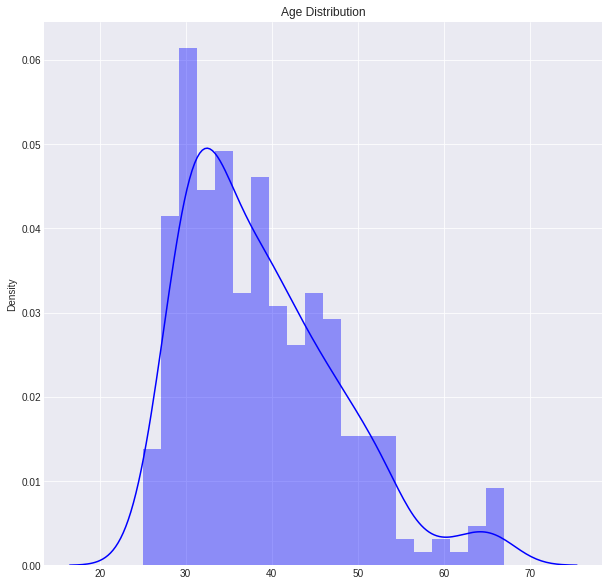

In [65]:
plt.figure(figsize=(10, 10))
plt.title("Age Distribution")
sns.distplot(ages, color="blue", bins=20)

**Тесты на нормальность**

В этом разделе перечислены статистические тесты, которые используются, чтобы проверить, имеют ли данные о возрасте распределение Гаусса.

Тест Шапиро-Вилка


    H0: образец имеет гауссово распределение.
    H1: образец не имеет гауссовского распределения.


In [66]:
from scipy.stats import shapiro
stat, p = shapiro(ages)

In [67]:
stat, p

(0.9287771582603455, 5.159150884281871e-11)

Тест д'Агостино на K ^ 2


    H0: образец имеет гауссово распределение.
    H1: образец не имеет гауссовского распределения.


In [68]:
from scipy.stats import normaltest
stat, p = normaltest(ages)
stat, p

(38.99451399614658, 3.407602070753399e-09)

Тест Андерсона-Дарлинга


    H0: образец имеет гауссово распределение.
    H1: образец не имеет гауссовского распределения.


In [69]:
from scipy.stats import anderson
result = anderson(ages)
result

AndersonResult(statistic=5.716515591760356, critical_values=array([0.569, 0.648, 0.777, 0.907, 1.078]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

BoxPlot

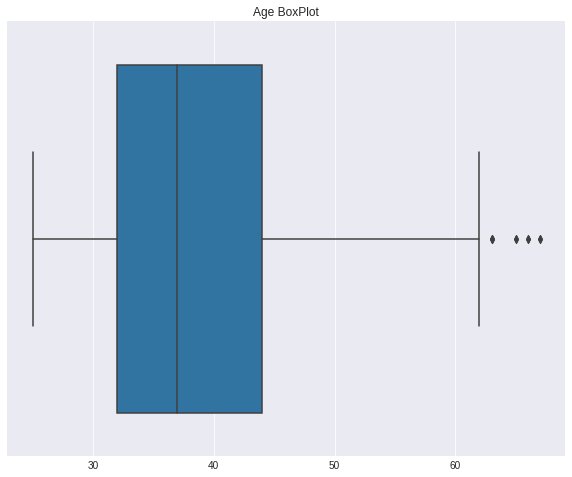

In [70]:
plt.figure(figsize=(10, 8))
plt.title("Age BoxPlot")
sns.boxplot(x=ages)

После проведенных исследований, можно опровергнуть о нормальности распределения возрастного признака

Pay Rate

In [71]:
pay_rate = []
cursor.execute('SELECT hr_dataset."Pay Rate" FROM hr_dataset')
tmp = cursor.fetchall()
for item in tmp:
    pay_rate.append(item[0])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


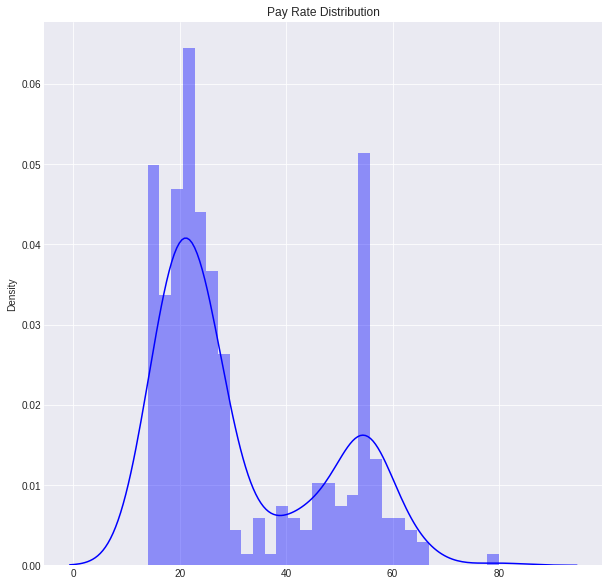

In [72]:
plt.figure(figsize=(10, 10))
plt.title("Pay Rate Distribution")
sns.distplot(pay_rate, color="blue", bins=30)

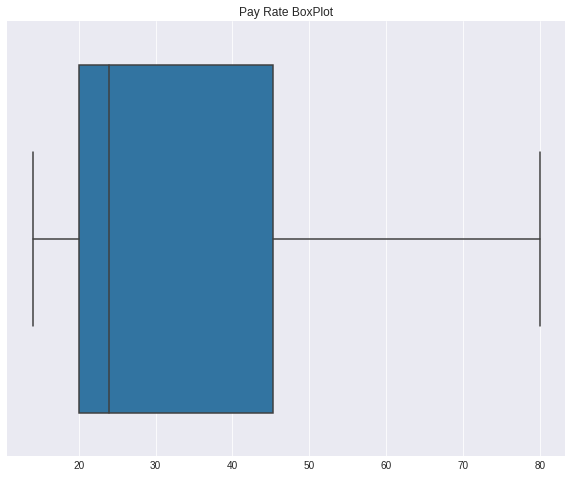

In [73]:
plt.figure(figsize=(10, 8))
plt.title("Pay Rate BoxPlot")
sns.boxplot(x=pay_rate)

Рассеивание Age и Pay Rate

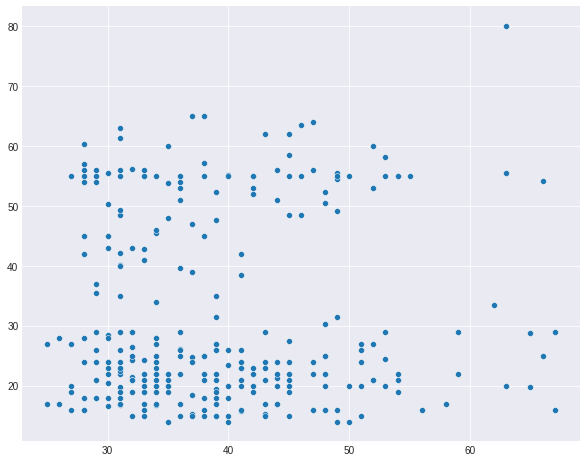

In [74]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=ages, y=pay_rate)

**Корреляционные тесты**

Коэффициент корреляции Пирсона


    H0: два образца независимы
    H1: существует зависимость между образцами.


In [75]:
from scipy.stats import pearsonr
corr, p = pearsonr(ages, pay_rate)
corr, p

(0.017468767404020764, 0.7593379748048241)

Ранговая корреляция Кендалла


    H0: два образца независимы.
    H1: существует зависимость между образцами.


In [76]:
from scipy.stats import kendalltau
corr, p = kendalltau(ages, pay_rate)
corr, p

(-0.028371533110622755, 0.47065502088918687)

Здесь можно сделать гипотезу о том, что возраст и pay rate независимы друг от друга

BoxPlot по Age и Sex

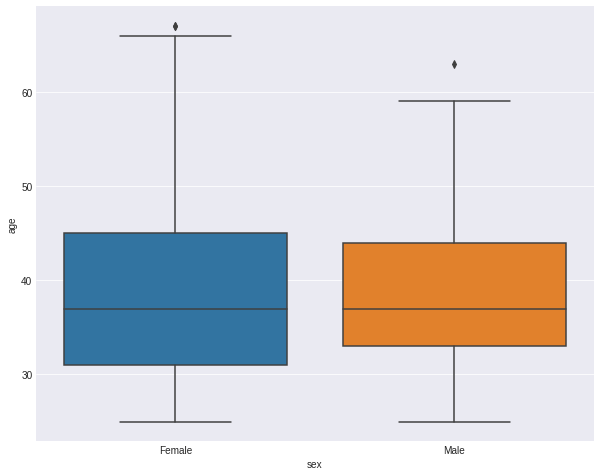

In [77]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="sex", y="age", data=hr_dataset_df)

BoxPlot по Pay Rate и Sex

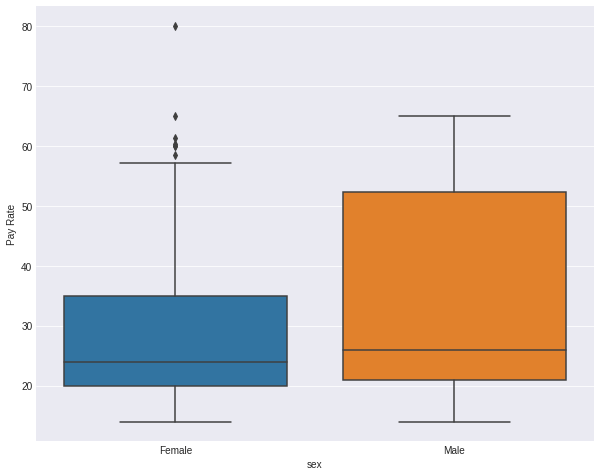

In [78]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="sex", y="Pay Rate", data=hr_dataset_df)

Хоть средняя зарплата одинакова, но в осном охват значений у мужчин больше, т.е. вероятность получать 50 ед. будучи мужчиной больше, чем у женщин

BarPlot по другим номинальным признакам

In [79]:
cursor.execute('SELECT maritaldesc, count(*) as maritaldesc_count FROM hr_dataset group by maritaldesc')
tmp = cursor.fetchall()
tmp

[('Widowed', 8),
 ('Married', 123),
 ('Separated', 12),
 ('Single', 137),
 ('Divorced', 30)]

In [80]:
maritaldesc_indexes = []
maritaldesc_counts = []
for item in tmp:
    maritaldesc_indexes.append(item[0])
    maritaldesc_counts.append(item[1])

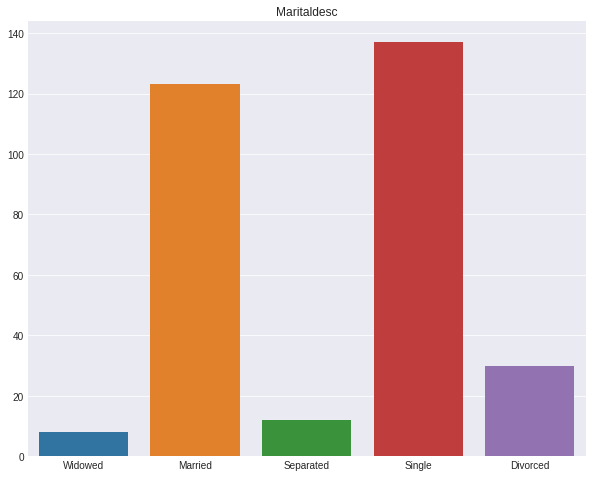

In [81]:
plt.figure(figsize=(10, 8))
plt.title("Maritaldesc")
sns.barplot(x=maritaldesc_indexes, y=maritaldesc_counts)

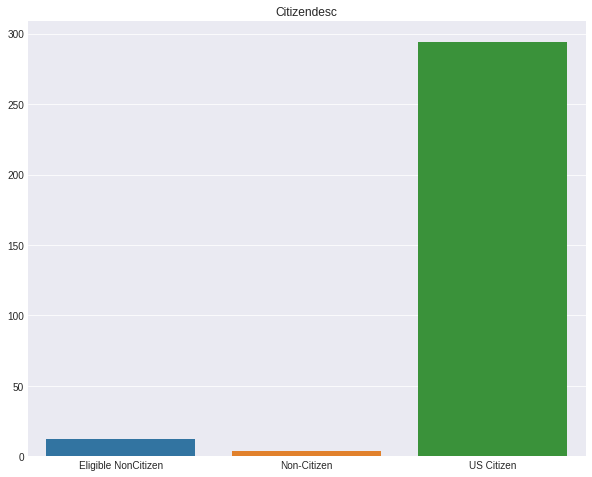

In [82]:
cursor.execute('SELECT citizendesc, count(*) as citizendesc_count FROM hr_dataset group by citizendesc')
tmp = cursor.fetchall()

citizendesc_indexes = []
citizendesc_counts = []
for item in tmp:
    citizendesc_indexes.append(item[0])
    citizendesc_counts.append(item[1])

plt.figure(figsize=(10, 8))
plt.title("Сitizendesc")
sns.barplot(x=citizendesc_indexes, y=citizendesc_counts)

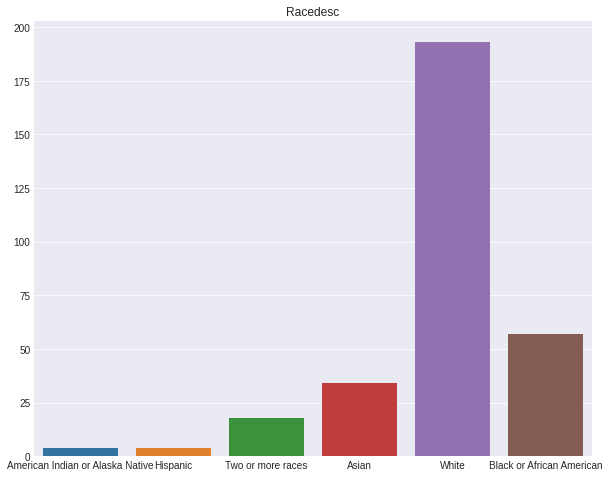

In [83]:
cursor.execute('SELECT racedesc, count(*) as racedesc_count FROM hr_dataset group by racedesc')
tmp = cursor.fetchall()

racedesc_indexes = []
racedesc_counts = []
for item in tmp:
    racedesc_indexes.append(item[0])
    racedesc_counts.append(item[1])

plt.figure(figsize=(10, 8))
plt.title("Racedesc")
sns.barplot(x=racedesc_indexes, y=racedesc_counts)

Проверим зависимости номинальных признаков при помощи Тест хи-квадрат

По признаку Sex и Materialdesc

In [84]:
cursor.execute('SELECT maritaldesc, sex as maritaldesc_count FROM hr_dataset')
tmp = cursor.fetchall()

sex_material = pd.DataFrame(data=tmp)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

sex_material[2] = le.fit_transform(sex_material[0])
sex_material[3] = le.fit_transform(sex_material[1])

from scipy.stats import chi2_contingency
pd.crosstab(sex_material[2],sex_material[3])
stat, p, dof, expected = chi2_contingency(pd.crosstab(sex_material[2],sex_material[3]))
stat, p, dof, expected 

(2.1593757595599516, 0.7064731688638107, 4, array([[17.12903226, 12.87096774],
        [70.22903226, 52.77096774],
        [ 6.8516129 ,  5.1483871 ],
        [78.22258065, 58.77741935],
        [ 4.56774194,  3.43225806]]))

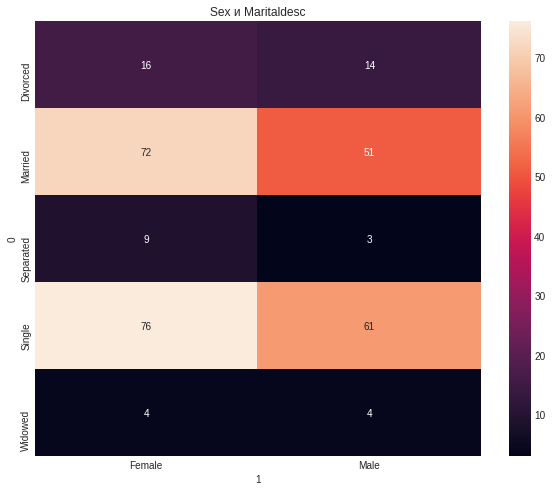

In [85]:
cursor.execute('SELECT sex, maritaldesc, count(*) as racedesc_count FROM hr_dataset group by sex, maritaldesc')
tmp = cursor.fetchall()
sex_material1 = sex_material.groupby([0, 1]).size().reset_index(name='counts')
plt.figure(figsize=(10, 8))
plt.title("Sex и Maritaldesc")
sns.heatmap(sex_material1.pivot(index=0, columns=1, values='counts'), annot=True, fmt="d")

По признаку Sex и Citizen

In [86]:
cursor.execute('SELECT citizendesc, sex FROM hr_dataset')
tmp = cursor.fetchall()

sex_material = pd.DataFrame(data=tmp)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

sex_material[2] = le.fit_transform(sex_material[0])
sex_material[3] = le.fit_transform(sex_material[1])

from scipy.stats import chi2_contingency
pd.crosstab(sex_material[2],sex_material[3])
stat, p, dof, expected = chi2_contingency(pd.crosstab(sex_material[2],sex_material[3]))
stat, p, dof, expected 

(0.7703580986364217,
 0.6803288128886154,
 2,
 array([[  6.8516129 ,   5.1483871 ],
        [  2.28387097,   1.71612903],
        [167.86451613, 126.13548387]]))

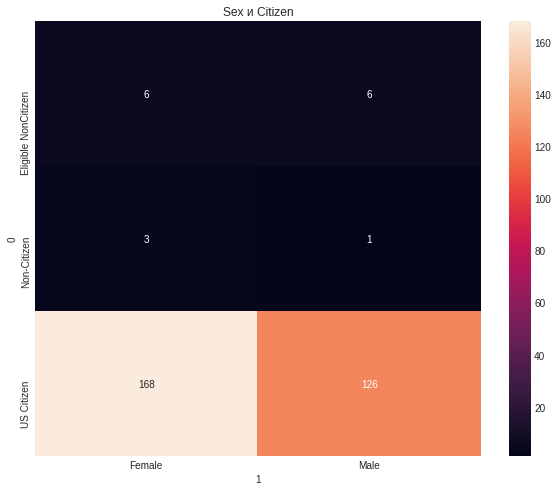

In [87]:
cursor.execute('SELECT sex, citizendesc, count(*) as racedesc_count FROM hr_dataset group by sex, citizendesc')
tmp = cursor.fetchall()
sex_material1 = sex_material.groupby([0, 1]).size().reset_index(name='counts')
plt.figure(figsize=(10, 8))
plt.title("Sex и Citizen")
sns.heatmap(sex_material1.pivot(index=0, columns=1, values='counts'), annot=True, fmt="d")

По признаку Sex и Race

In [88]:
cursor.execute('SELECT racedesc, sex FROM hr_dataset')
tmp = cursor.fetchall()

sex_material = pd.DataFrame(data=tmp)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

sex_material[2] = le.fit_transform(sex_material[0])
sex_material[3] = le.fit_transform(sex_material[1])

from scipy.stats import chi2_contingency
pd.crosstab(sex_material[2],sex_material[3])
stat, p, dof, expected = chi2_contingency(pd.crosstab(sex_material[2],sex_material[3]))
stat, p, dof, expected 

(2.207401339599209, 0.8197661749774067, 5, array([[  2.28387097,   1.71612903],
        [ 19.41290323,  14.58709677],
        [ 32.54516129,  24.45483871],
        [  2.28387097,   1.71612903],
        [ 10.27741935,   7.72258065],
        [110.19677419,  82.80322581]]))

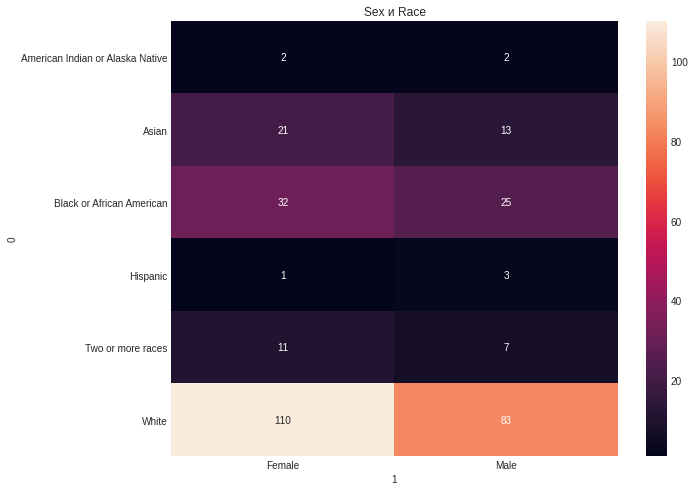

In [89]:
cursor.execute('SELECT sex, racedesc, count(*) as racedesc_count FROM hr_dataset group by sex, racedesc')
tmp = cursor.fetchall()
sex_material1 = sex_material.groupby([0, 1]).size().reset_index(name='counts')
plt.figure(figsize=(10, 8))
plt.title("Sex и Race")
sns.heatmap(sex_material1.pivot(index=0, columns=1, values='counts'), annot=True, fmt="d")

Рассмотрим признак Days Employed

In [90]:
days_employed = []
cursor.execute('SELECT hr_dataset."Days Employed" FROM hr_dataset')
tmp = cursor.fetchall()
for item in tmp:
    days_employed.append(item[0])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


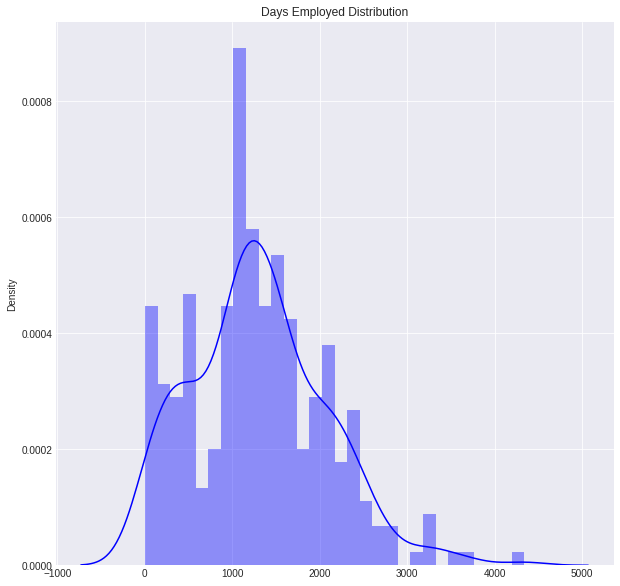

In [91]:
plt.figure(figsize=(10, 10))
plt.title("Days Employed Distribution")
sns.distplot(days_employed, color="blue", bins=30)

Тест на нормальность распределения признака Days Employed

In [92]:
from scipy.stats import shapiro, normaltest
print("Shapiro:", shapiro(days_employed))
print("Normaltest:", normaltest(days_employed))

Shapiro: (0.9724364876747131, 1.1667956641758792e-05)
Normaltest: NormaltestResult(statistic=15.786577315955544, pvalue=0.00037324009540787523)


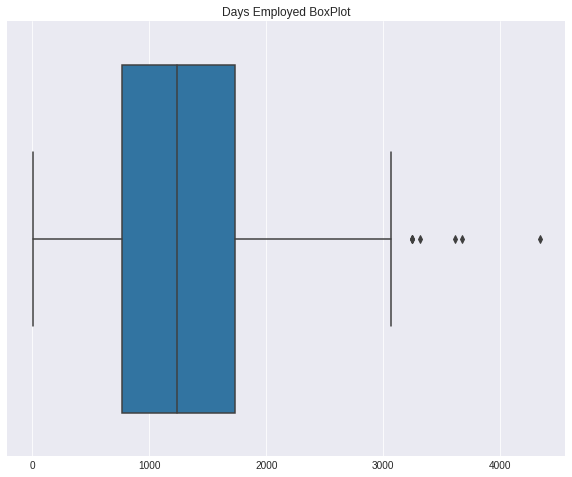

In [93]:
plt.figure(figsize=(10, 8))
plt.title("Days Employed BoxPlot")
sns.boxplot(x=days_employed)

Зависимость Days Employed с рассмотренными признаками

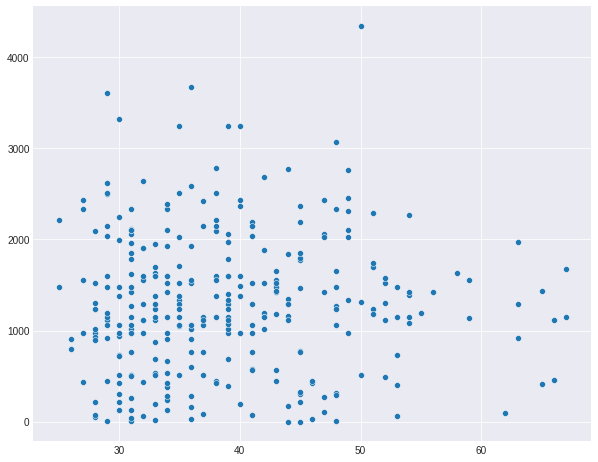

In [94]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=ages, y=days_employed)

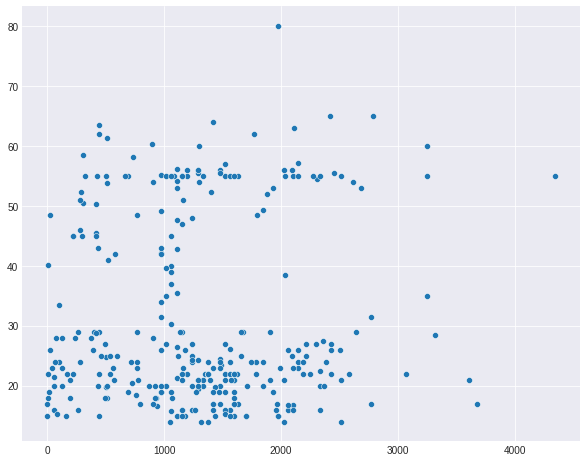

In [95]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=days_employed, y=pay_rate)

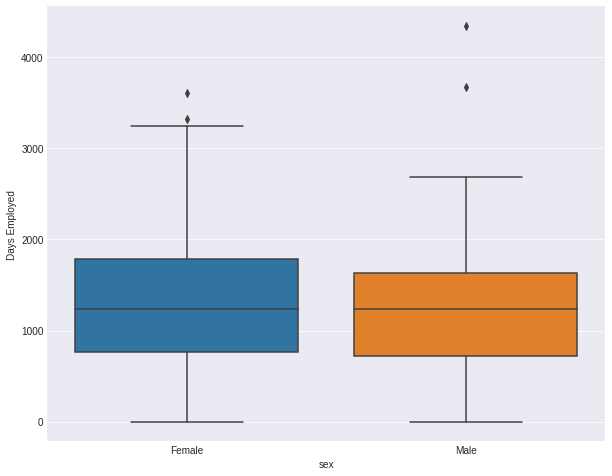

In [96]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="sex", y="Days Employed", data=hr_dataset_df)

Выведим статистику

In [97]:
cursor.execute('SELECT sum(age)/count(*), sum(age*age)/count(*) - (sum(age)*sum(age))/(count(*)*count(*)) FROM hr_dataset')
tmp = cursor.fetchall()
print("Среднее по возрасту", tmp[0][0])
print("Средне-квадратичное отклонение по возрасту", np.sqrt(tmp[0][1]))

Среднее по возрасту 38
Средне-квадратичное отклонение по возрасту 8.94427190999916


In [98]:
cursor.execute('SELECT sum(hr_dataset."Pay Rate")/count(*), sum(hr_dataset."Pay Rate"*hr_dataset."Pay Rate")/count(*) - (sum(hr_dataset."Pay Rate")*sum(hr_dataset."Pay Rate"))/(count(*)*count(*)) FROM hr_dataset')
tmp = cursor.fetchall()
print("Среднее по Pay Rate", tmp[0][0])
print("Средне-квадратичное отклонение по Pay Rate", np.sqrt(tmp[0][1]))

Среднее по Pay Rate 31.284806577621
Средне-квадратичное отклонение по Pay Rate 15.35878263679407


In [99]:
cursor.execute('SELECT sum(hr_dataset."Days Employed")/count(*), sum(hr_dataset."Days Employed"*hr_dataset."Days Employed")/count(*) - (sum(hr_dataset."Days Employed")*sum(hr_dataset."Days Employed"))/(count(*)*count(*)) FROM hr_dataset')
tmp = cursor.fetchall()
print("Среднее по Days Employed", tmp[0][0])
print("Средне-квадратичное отклонение по Days Employed", np.sqrt(tmp[0][1]))

Среднее по Days Employed 1296
Средне-квадратичное отклонение по Days Employed 768.2486576623483


Разделим возраст на 2 группы до 40 и после

До 40 лет

In [100]:
cursor.execute('SELECT age, sex, hr_dataset."Days Employed", hr_dataset."Pay Rate" FROM hr_dataset WHERE age < 40')
tmp = cursor.fetchall()

In [101]:
ages_less_40 = []
days_employed_less_40 = []
pay_rate_less_40 = []
sex_less_40 = []

for item in tmp:
    ages_less_40.append(item[0])
    sex_less_40.append(item[1])
    days_employed_less_40.append(item[2])
    pay_rate_less_40.append(item[3])

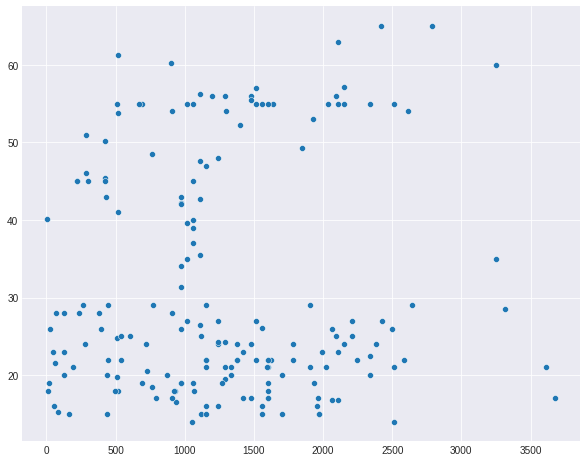

In [102]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=days_employed_less_40, y=pay_rate_less_40)

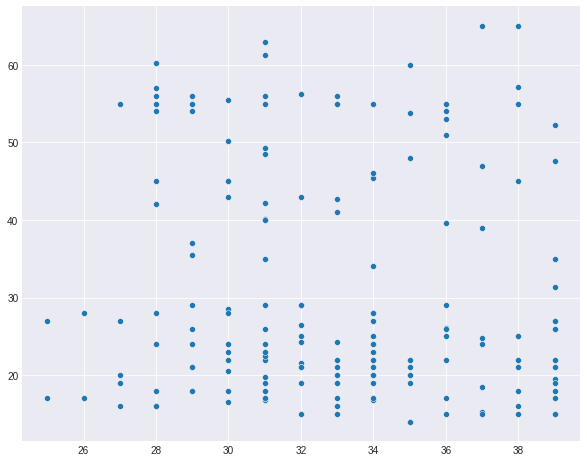

In [103]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=ages_less_40, y=pay_rate_less_40)

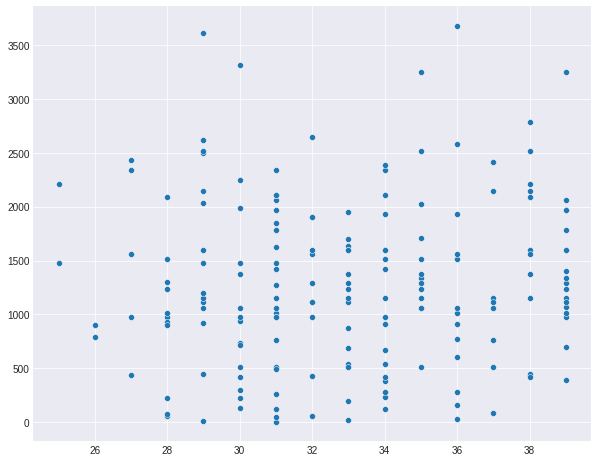

In [104]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=ages_less_40, y=days_employed_less_40)

После 40

In [105]:
cursor.execute('SELECT age, sex, hr_dataset."Days Employed", hr_dataset."Pay Rate" FROM hr_dataset WHERE age >= 40')
tmp = cursor.fetchall()

In [106]:
ages_more_40 = []
days_employed_more_40 = []
pay_rate_more_40 = []
sex_more_40 = []

for item in tmp:
    ages_more_40.append(item[0])
    sex_more_40.append(item[1])
    days_employed_more_40.append(item[2])
    pay_rate_more_40.append(item[3])

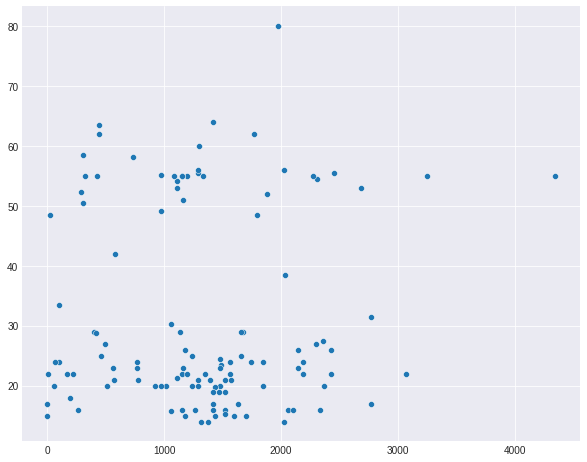

In [107]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=days_employed_more_40, y=pay_rate_more_40)

In [108]:
hr_dataset_df.head()

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,Pay Rate,state,zip,dob,sex,maritaldesc,citizendesc,Hispanic/Latino,racedesc,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.50,MA,1450,1987-11-24,Female,Married,US Citizen,No,Black or African American,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.00,MA,1460,1984-04-26,Male,Divorced,US Citizen,No,Black or African American,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.00,MA,2703,1986-09-01,Male,Single,US Citizen,No,White,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,21.50,MA,2170,1985-09-16,Female,Married,US Citizen,No,White,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,16.56,MA,2330,1988-05-19,Female,Single,US Citizen,No,White,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


# production_staff - inner join - hr_dataset

In [109]:
#Чтение данных из таблицы hr_dataset
cursor.execute('SELECT * FROM production_staff inner join hr_dataset on production_staff."Employee Name" = hr_dataset."Employee Name"')
production_staff = cursor.fetchall()
print(len(production_staff))

208


In [110]:
cursor.execute('SELECT * FROM production_staff inner join hr_dataset on production_staff."Employee Name" = hr_dataset."Employee Name" LIMIT 0')
production_staff_cols = [desc[0] for desc in cursor.description]
production_staff_df = pd.DataFrame(production_staff, columns=production_staff_cols)
print(production_staff_cols)

['id', 'Employee Name', 'Race Desc', 'Date of Hire', 'TermDate', 'Reason for Term', 'Employment Status', 'Department', 'Position', 'Pay', 'Manager Name', 'Performance Score', 'Abutments/Hour Wk 1', 'Abutments/Hour Wk 2', 'Daily Error Rate', '90-day Complaints', 'id', 'Employee Name', 'Employee Number', 'marriedid', 'maritalstatusid', 'genderid', 'empstatus_id', 'deptid', 'perf_scoreid', 'age', 'Pay Rate', 'state', 'zip', 'dob', 'sex', 'maritaldesc', 'citizendesc', 'Hispanic/Latino', 'racedesc', 'Date of Hire', 'Days Employed', 'Date of Termination', 'Reason For Term', 'Employment Status', 'department', 'position', 'Manager Name', 'Employee Source', 'Performance Score']


In [132]:
#Чтение данных из таблицы hr_dataset
cursor.execute('SELECT t."Pay", t."age", t."Pay Rate" FROM ' +
               '(SELECT * FROM production_staff inner join hr_dataset on production_staff."Employee Name" = hr_dataset."Employee Name")t')
production_staff = cursor.fetchall()

In [133]:
pays = []
ages = []
pay_rates = []
for item in production_staff:
    tmp_s = item[0][1:]
    pays.append(float(tmp_s))
    ages.append(item[1])
    pay_rates.append(item[2])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


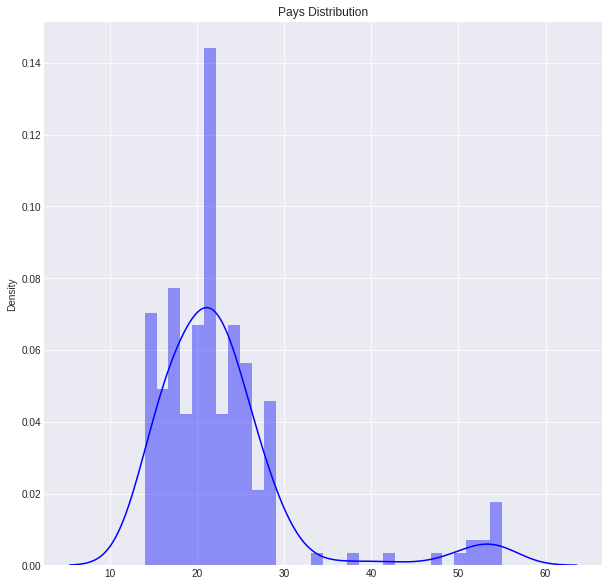

In [134]:
plt.figure(figsize=(10, 10))
plt.title("Pays Distribution")
sns.distplot(pays, color="blue", bins=30)

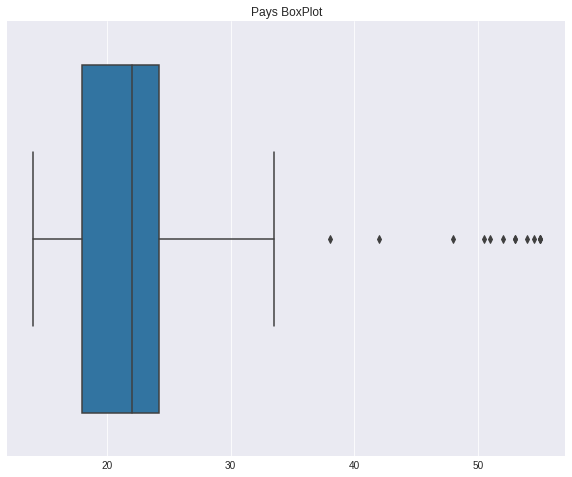

In [135]:
plt.figure(figsize=(10, 8))
plt.title("Pays BoxPlot")
sns.boxplot(x=pays)

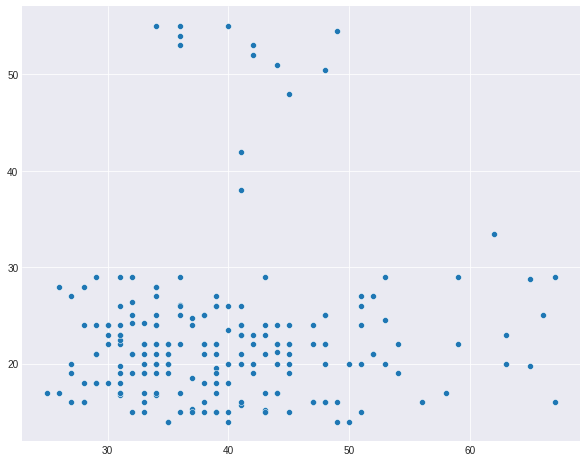

In [136]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=ages, y=pays)

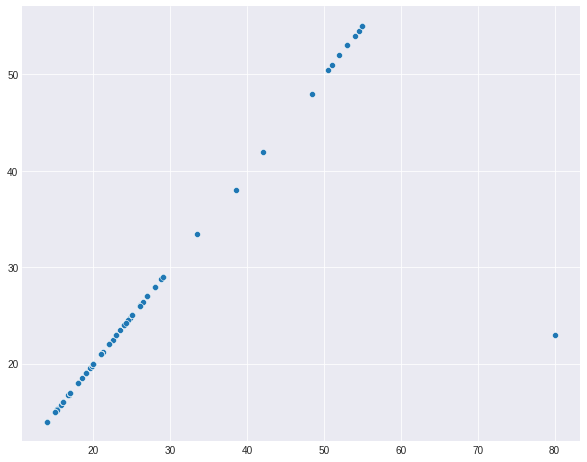

In [137]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pay_rates, y=pays)

In [138]:
cursor.execute('SELECT t."Abutments/Hour Wk 1", t."Abutments/Hour Wk 2", t."Pay" FROM ' +
               '(SELECT * FROM production_staff inner join hr_dataset on production_staff."Employee Name" = hr_dataset."Employee Name")t')
production_staff = cursor.fetchall()

In [139]:
hour_Wk_1 = []
hour_Wk_2 = []
pays = []
for item in production_staff:
    tmp_s = item[2][1:]
    pays.append(float(tmp_s))
    hour_Wk_1.append(item[0])
    hour_Wk_2.append(item[1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


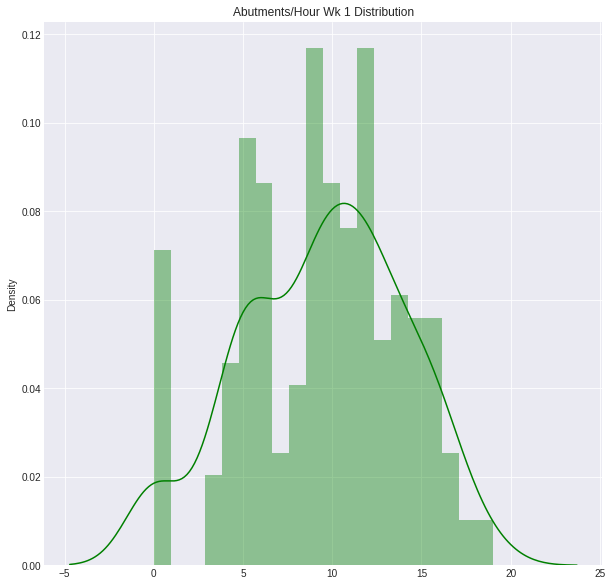

In [141]:
plt.figure(figsize=(10, 10))
plt.title("Abutments/Hour Wk 1 Distribution")
sns.distplot(hour_Wk_1, color="green", bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


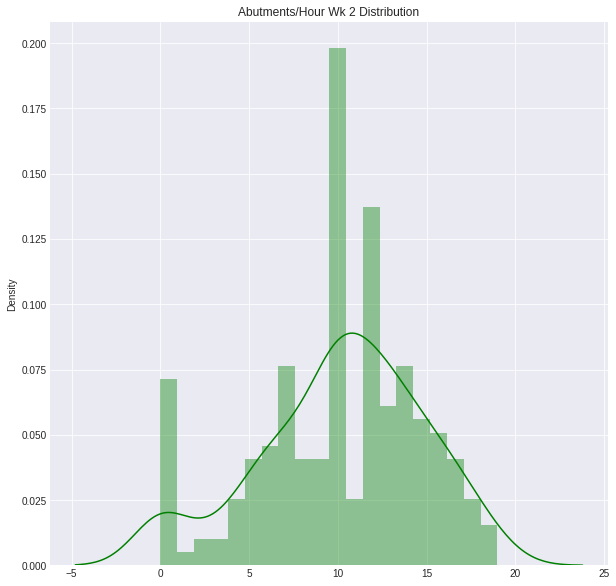

In [142]:
plt.figure(figsize=(10, 10))
plt.title("Abutments/Hour Wk 2 Distribution")
sns.distplot(hour_Wk_2, color="green", bins=20)

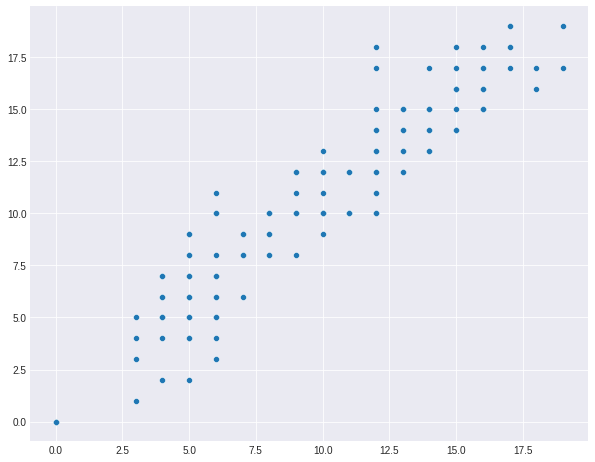

In [145]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=hour_Wk_1, y=hour_Wk_2)

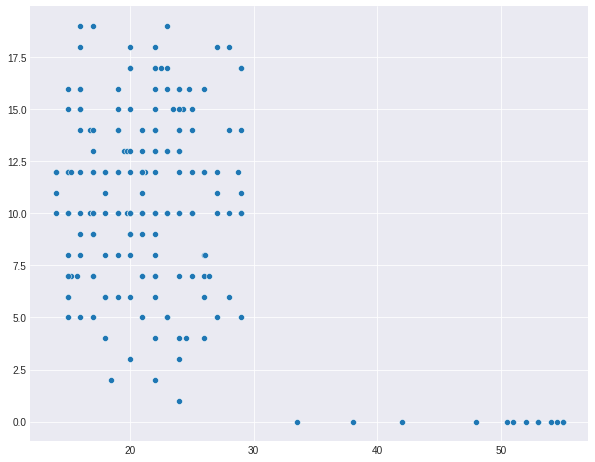

In [146]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pays, y=hour_Wk_2)

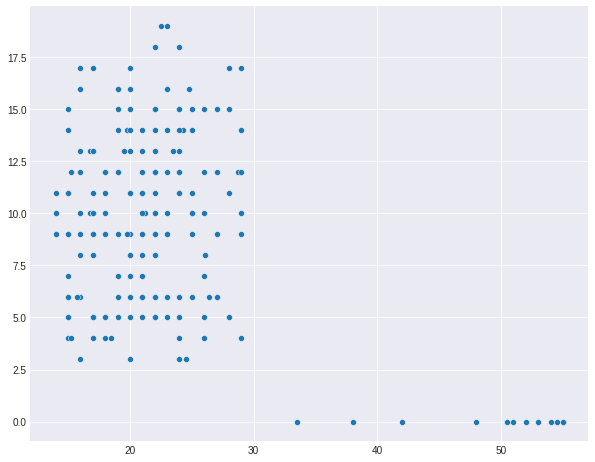

In [147]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pays, y=hour_Wk_1)

In [154]:
production_staff_df.head()

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,Pay Rate,state,zip,dob,sex,maritaldesc,citizendesc,Hispanic/Latino,racedesc,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,82,"King, Janet",White,2012-07-02,None,N/A - still employed,Active,Production,Production Technician I,$23.00,Elijiah Gray,Fully Meets,9.0,10.0,1.0,1.0,11,"King, Janet",1001495124,1,1,0,1,2,3,63,80.0,MA,1902,1954-09-21,Female,Married,US Citizen,Yes,White,2012-07-02,1973,None,N/A - still employed,Active,Executive Office,President & CEO,Board of Directors,Pay Per Click - Google,Fully Meets
1,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0,54,"Albert, Michael",1501072311,0,2,1,1,5,3,49,54.5,MA,2169,1968-10-10,Male,Divorced,US Citizen,No,White,2011-08-01,2309,None,N/A - still employed,Active,Production,Production Manager,Janet King,Employee Referral,Fully Meets
2,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0,55,"Bozzi, Charles",1303054580,0,0,1,5,5,3,48,50.5,MA,1901,1970-03-10,Male,Single,US Citizen,No,Asian,2013-09-30,311,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,Janet King,Billboard,Fully Meets
3,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0,56,"Butler, Webster L",1110029990,0,0,1,1,5,4,34,55.0,MA,2169,1983-08-09,Male,Single,US Citizen,No,White,2016-01-28,668,None,N/A - still employed,Active,Production,Production Manager,Janet King,Pay Per Click - Google,Exceeds
4,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0,57,"Dunn, Amy",1409070147,0,0,0,1,5,3,44,51.0,MA,1731,1973-11-28,Female,Single,US Citizen,No,White,2014-09-18,1165,None,N/A - still employed,Active,Production,Production Manager,Janet King,Search Engine - Google Bing Yahoo,Fully Meets


In [ ]:
cursor.close()
conn.close()

# Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [ ]:
### YOUR CODE HERE ###


